In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([
[158, 64],
[170, 86],
[183, 84],
[191, 80],
[155, 49],
[163, 59],
[180, 67],
[158, 54],
[170, 67]
])

In [3]:
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female',
'female', 'female']

In [4]:
X_train.ndim

2

In [5]:
for i, x in enumerate(X_train):
    print(i)
    print(x)

0
[158  64]
1
[170  86]
2
[183  84]
3
[191  80]
4
[155  49]
5
[163  59]
6
[180  67]
7
[158  54]
8
[170  67]


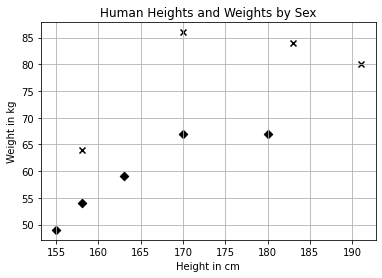

In [6]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
# Use 'x' markers for instances that are male and diamond markers for instances that are female
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

In [7]:
# Test Instance

In [8]:
x = np.array([[155, 70]])

In [9]:
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [10]:
# k =3

In [11]:
nearest_neighbor_indices = distances.argsort()[:3]


In [12]:
nearest_neighbor_indices

array([0, 5, 8], dtype=int64)

In [13]:
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)


In [14]:
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [15]:
from collections import Counter
b = Counter(np.take(y_train,distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

In [16]:
# let's implement a KNN classifier using scikit-learn

In [17]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [18]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [19]:
yy = y_train_binarized.reshape(-1)

In [20]:
yy

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [21]:
y_train_binarized.ndim

2

In [22]:
yy.ndim

1

In [23]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))

KNeighborsClassifier(n_neighbors=3)

In [24]:
aa = np.array([155, 70]).reshape(1,-1)

In [25]:
aa

array([[155,  70]])

In [26]:
aa.ndim

2

In [27]:
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1,-1))[0]

In [29]:
prediction_binarized

0

In [30]:
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

In [31]:
X_test = np.array([
[168, 65],
[180, 96],
[160, 52],
[169, 67]
])

In [32]:
y_test = ['male', 'male', 'female', 'female']

In [33]:
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

Binarized labels: [1 1 0 0]


In [35]:
y_test_binarized

array([[1],
       [1],
       [0],
       [0]])

In [34]:
y_test_binarized.T

array([[1, 1, 0, 0]])

In [36]:
cc = y_test_binarized.T[0]

In [37]:
cc

array([1, 1, 0, 0])

In [38]:
X_test.ndim

2

In [39]:
predictions_binarized = clf.predict(X_test)

In [40]:
predictions_binarized

array([0, 1, 0, 0])

In [41]:
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,predictions_binarized))

Accuracy: 0.75


In [43]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized,predictions_binarized))

Precision: 1.0


In [44]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized,predictions_binarized))

Recall: 0.5


In [45]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized,predictions_binarized))

F1 score: 0.6666666666666666


In [46]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized,predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



In [48]:
# KNN Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [50]:
X_train = np.array([
[158, 1],
[170, 1],
[183, 1],
[191, 1],
[155, 0],
[163, 0],
[180, 0],
[158, 0],
[170, 0]
])

In [51]:
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

In [52]:
X_test = np.array([
[168, 1],
[180, 1],
[160, 0],
[169, 0]
])

In [53]:
y_test = [65, 96, 52, 67]

In [54]:
K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
predictions = clf.predict(X_test)

In [57]:
y_test

[65, 96, 52, 67]

In [58]:
print('Predicted weights: %s' % predictions)

Predicted weights: [70.66666667 79.         59.         70.66666667]


In [59]:
print('Coefficient of determination: %s' % r2_score(y_test,predictions))

Coefficient of determination: 0.6290565226735438


In [60]:
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))

Mean absolute error: 8.333333333333336


In [61]:
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

Mean squared error: 95.8888888888889


In [62]:
# Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [64]:
print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


In [65]:
X_test_scaled = ss.transform(X_test)

In [66]:
clf.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [67]:
predictions = clf.predict(X_test_scaled)

In [68]:
print('Predicted weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

Predicted weights: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893


In [69]:
y_test

[65, 96, 52, 67]